## Winter 2021 Data Science Intern Challenge

<font color='blue'>Name: Thi Dinh</font>

#### Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

b. What metric would you report for this dataset?

c. What is its value?

**My steps will be:**

> Add one more column for unit_price.


> Check missing values, outliers. Then remove outliers if any.

> Calculate average order values (excluding orders have outliers in total_items and unit_price).

> Each store represent for 1 product, products have different price and users would buy more than 1 product as they shop in different stores. I would like to calculate average user spending (excluding orders have outliers in total_items and unit_prices).

> Visualization on number of items sold, excluding outliers. I visualize data of quantity as each shop sells only one product and the price are different.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 14,6

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv', parse_dates=['created_at'])
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [3]:
#add one more column for price of item in each store
df['unit_price'] = df['order_amount']/df['total_items']

In [4]:
#check dataframe info and it also gives information of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
 7   unit_price      5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 312.6+ KB


**There is no missing values.**

In [5]:
#generate descriptive statistics
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


**There are outliers in order_amount, total_items, unit_price.**

**Order_amount is the calculation of total_items and unit_price so I will check and remove outliers in total_items and unit_price only.**

In [6]:
selected_columns = ['total_items', 'unit_price']
for col in selected_columns:
  print(df[col].value_counts().sort_index(ascending=False))

2000      17
8          1
6          9
5         77
4        293
3        941
2       1832
1       1830
Name: total_items, dtype: int64
25725.0     46
352.0       51
201.0       53
196.0       61
195.0       54
193.0       44
190.0       35
187.0      105
184.0       49
181.0      112
178.0      109
177.0      148
176.0      152
173.0       99
172.0       35
171.0       48
169.0       54
168.0       39
166.0       43
165.0       58
164.0      161
163.0      122
162.0       48
161.0      101
160.0      206
158.0       94
156.0      197
155.0       42
154.0       54
153.0      256
149.0       52
148.0      101
147.0       53
146.0       89
145.0       92
144.0       39
142.0      197
140.0       55
138.0       59
136.0      105
134.0       86
133.0      151
132.0       46
131.0       97
130.0      150
129.0      142
128.0       93
127.0       52
122.0       50
118.0      118
117.0       77
116.0       58
114.0       59
112.0      124
111.0       40
101.0       42
94.0        55
90.0     

In [7]:
#detect outliers by using IQR. Calculate IQR
Q1 = df[selected_columns].quantile(0.25)
Q3 = df[selected_columns].quantile(0.75)
IQR = Q3-Q1
print(IQR)

total_items     2.0
unit_price     36.0
dtype: float64


In [8]:
print(Q1 - 1.5*IQR)
print(Q3 + 1.5*IQR)

total_items    -2.0
unit_price     79.0
dtype: float64
total_items      6.0
unit_price     223.0
dtype: float64


In [9]:
#remove rows have outliers in total_items and unit_price
df_new = df[df['total_items'].between(-2,6)]
df_new = df_new[(df_new['unit_price'].between(79,223))]
df_new.describe()

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000,4902.000000
mean,2499.249490,49.900041,849.882701,300.000000,1.994492,150.403713
std,1444.177909,29.157282,86.880774,155.574803,0.978951,23.852340
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.250000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2498.500000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3749.750000,74.000000,925.000000,386.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,6.000000,201.000000


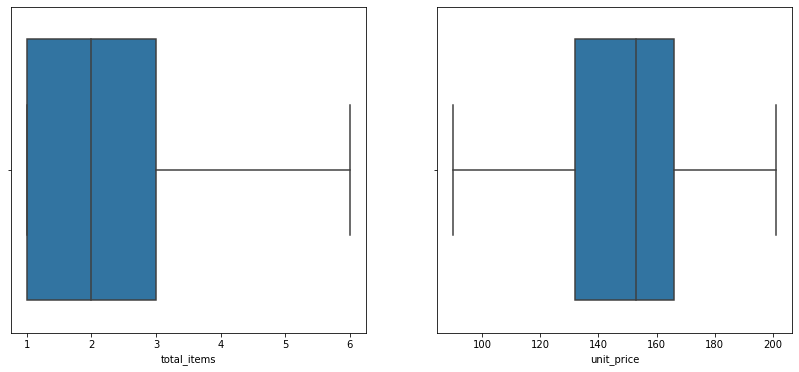

In [10]:
#check outliers again by visualization on df_new
fig, axes =plt.subplots(1,2)
sns.boxplot(df_new['total_items'], ax=axes[0])
sns.boxplot(df_new['unit_price'], ax=axes[1])

**The new dataframe doesn't have any outliers in total_items and unit_price**

In [11]:
#Our previous calculation of average order value
aov = df['order_amount'].sum() / len(df)
aov

3145.128

In [12]:
#Calculate new average order value (exclude orders have outliers in total_items and unit_price)
aov_new = df_new['order_amount'].sum() / len(df_new)
aov_new

300.0

In [13]:
#calculate total spending group by users (exclude outliers)
spending_by_user = df_new.groupby('user_id')['order_amount'].sum()

#Calculate average user spending (exclude outliers)
average_spending = spending_by_user.sum()/len(spending_by_user)
average_spending

4902.0

**Visualization on number of items sold (as each shop sells only one product and the price are different)**

<ipython-input-14-95a43aa81d16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_item['created_date'] = [x.strftime("%d") for x in df_clean_item['created_at']]


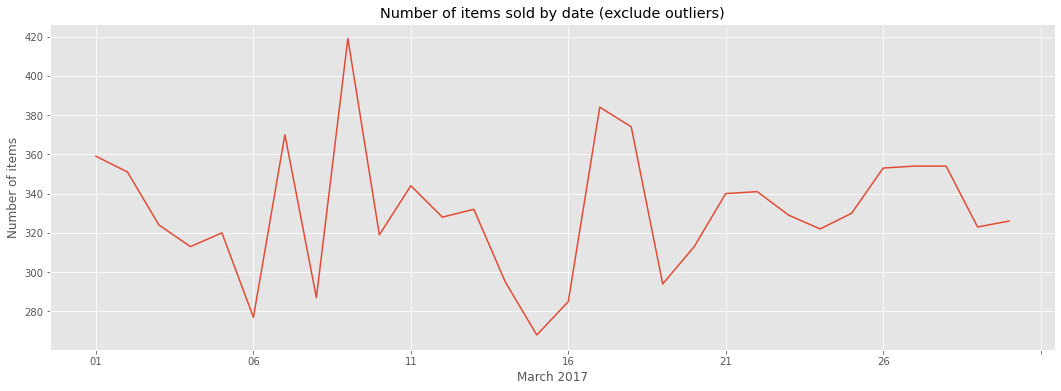

In [14]:
#dataframe exclude rows have outliers in total_items
df_clean_item = df[df['total_items'].between(-2,6)]

#add one more column for date of orders
df_clean_item['created_date'] = [x.strftime("%d") for x in df_clean_item['created_at']]

#calculate number of items sold by date (exclude outliers)
df_by_date = df_clean_item.groupby('created_date')['total_items'].sum()
#plot
plt.style.use('ggplot')
plt.figure(figsize=(18,6))
df_by_date.plot()
plt.xlabel('March 2017')
plt.ylabel('Number of items')
plt.title('Number of items sold by date (exclude outliers)')
plt.show()

**There is a significant fluctuation in quantity solds between days in March 2017**

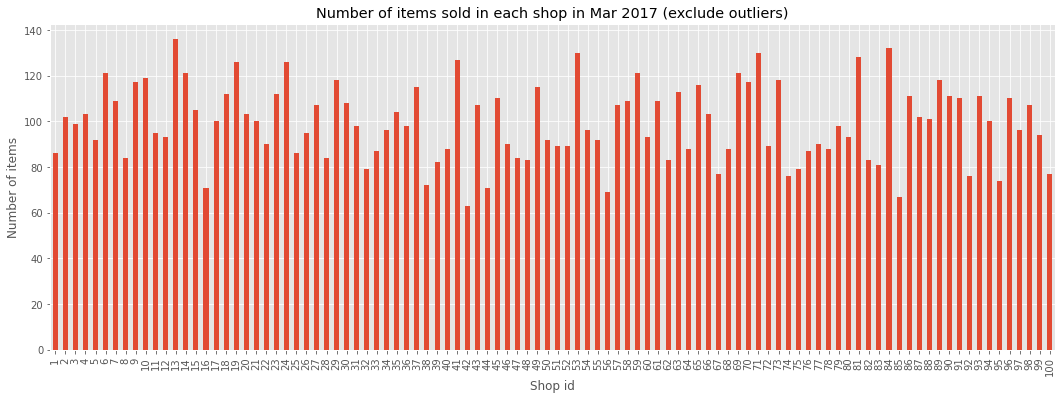

In [15]:
#total of items sold by shop_id (exclude outliers in total_items)
df_by_shop = df_clean_item.groupby('shop_id')['total_items'].sum()
#plot
plt.figure(figsize=(18,6))
df_by_shop.plot(kind='bar')
plt.ylabel('Number of items')
plt.xlabel('Shop id')
plt.title('Number of items sold in each shop in Mar 2017 (exclude outliers)')
plt.show()

**After removing outliers, shop_id 13 and 82 have the highest quantity sold while shop_id 42 has the lowest quantity sold.**